In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [3]:
df = pd.read_csv("compositeData.csv")
df

,fibre_length,basalt_fiber_content,curaua_fiber_content,tensile_strength
0,4,100,0,50.38
1,4,100,0,30.36
2,4,75,25,25.24
3,4,75,25,27.22
4,4,75,25,23.01
5,4,50,50,23.71
6,4,50,50,26.87
7,4,50,50,22.89
8,4,25,75,32.67
9,4,25,75,32.11


In [4]:
df.describe()

,fibre_length,basalt_fiber_content,curaua_fiber_content,tensile_strength
count,45.000000,45.00000,45.00000,45.000000
mean,7.644444,50.00000,50.00000,28.121778
std,3.053728,36.14994,36.14994,7.342803
min,4.000000,0.00000,0.00000,10.540000
25%,4.000000,25.00000,25.00000,23.710000
50%,8.000000,50.00000,50.00000,27.870000
75%,8.000000,75.00000,75.00000,32.110000
max,12.000000,100.00000,100.00000,50.380000


In [5]:
dataStuff = df[['fibre_length', 'basalt_fiber_content', 'curaua_fiber_content']]
targetStuff = df['tensile_strength']

In [6]:
xTrain, xTest, yTrain, yTest = train_test_split(dataStuff, targetStuff, test_size=0.2, random_state=42)

# LinearReg Model

In [7]:
modelLR = LinearRegression()
modelLR.fit(xTrain, yTrain)

LinearRegression()

In [8]:
yPred = modelLR.predict(xTest)
yPred

array([28.897658  , 28.33219196, 28.33219196, 25.7034481 , 32.0918679 ,
       25.7034481 , 29.36383086, 24.57251602, 26.16962096])

In [9]:
print("Root Mean Square Error: ", np.sqrt(mean_squared_error(yTest, yPred)))
print('Mean Squared Error:', mean_squared_error(yTest, yPred))
print('R-squared:', r2_score(yTest, yPred))

Root Mean Square Error:  7.428739387933987
Mean Squared Error: 55.18616889384183
R-squared: -0.07443982552013684


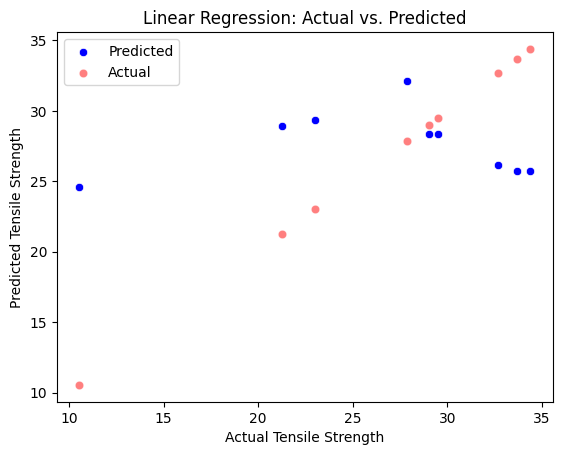

In [10]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('Linear Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# PolyReg Model

In [11]:
for i in range(1, 25):
    polyReg = PolynomialFeatures(degree=i)
    linReg = LinearRegression()
    modelPR = Pipeline([('poly', polyReg), ('linear', linReg)])
    modelPR.fit(xTrain, yTrain)
    yPred = modelPR.predict(xTest)
    print("Poly Features Degree: ", i)
    print("Root Mean Square Error: ", np.sqrt(mean_squared_error(yTest, yPred)))
    print('Mean Squared Error:', mean_squared_error(yTest, yPred))
    print('R-squared:', r2_score(yTest, yPred))
    print("\n")

Poly Features Degree:  1
Root Mean Square Error:  7.428739387933987
Mean Squared Error: 55.18616889384184
R-squared: -0.07443982552013706


Poly Features Degree:  2
Root Mean Square Error:  5.839834276191594
Mean Squared Error: 34.103664373382195
R-squared: 0.3360232113698519


Poly Features Degree:  3
Root Mean Square Error:  5.165081620354048
Mean Squared Error: 26.678068144919198
R-squared: 0.48059487626364494


Poly Features Degree:  4
Root Mean Square Error:  3.401164116669847


Mean Squared Error: 11.567917348522581
R-squared: 0.7747799612347269


Poly Features Degree:  5
Root Mean Square Error:  3.085003502151584
Mean Squared Error: 9.517246608287536
R-squared: 0.8147052243305541


Poly Features Degree:  6
Root Mean Square Error:  3.080414985270776
Mean Squared Error: 9.488956481480754
R-squared: 0.8152560152174644


Poly Features Degree:  7
Root Mean Square Error:  3.0804149852710814
Mean Squared Error: 9.488956481482637
R-squared: 0.8152560152174277


Poly Features Degree:  8
Root Mean Square Error:  3.08041498527019
Mean Squared Error: 9.488956481477146
R-squared: 0.8152560152175347


Poly Features Degree:  9
Root Mean Square Error:  3.0804149852706835
Mean Squared Error: 9.488956481480185
R-squared: 0.8152560152174755


Poly Features Degree:  10
Root Mean Square Error:  3.0804149852706897
Mean Squared Error: 9.488956481480223
R-squared: 0.8152560152174748


Poly Features Degree:  11
Root Mean Square Error:  3.0804149852708584
Mean Squared Error: 9.488956

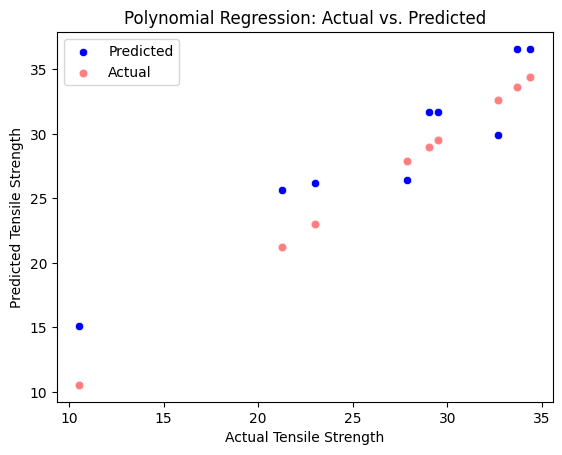

In [12]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('Polynomial Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# DecisionTreeReg Model

In [19]:
modelDT = DecisionTreeRegressor(random_state=42)
modelDT.fit(xTrain, yTrain)

DecisionTreeRegressor(random_state=42)

In [20]:
yPred = modelDT.predict(xTest)
yPred

array([25.65      , 31.71333333, 31.71333333, 36.595     , 26.455     ,
       36.595     , 26.23      , 15.1       , 29.92666667])

In [21]:
print("Root Mean Square Error: ", np.sqrt(mean_squared_error(yTest, yPred)))
print('Mean Squared Error:', mean_squared_error(yTest, yPred))
print('R-squared:', r2_score(yTest, yPred))

Root Mean Square Error:  3.0804149852708935
Mean Squared Error: 9.488956481481479
R-squared: 0.8152560152174503


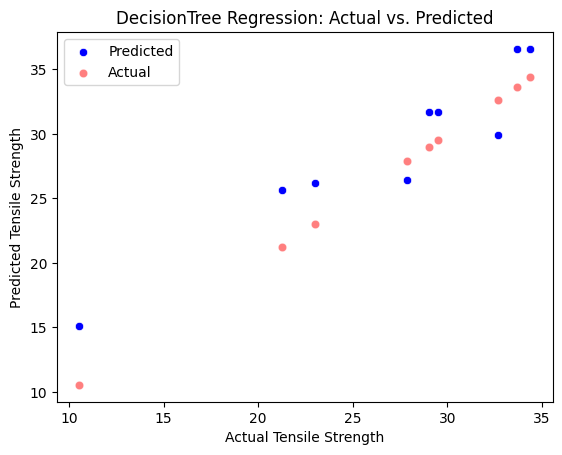

In [22]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('DecisionTree Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# RandomForestReg Model

In [23]:
modelRF = RandomForestRegressor(n_estimators=100, random_state=42)
modelRF.fit(xTrain, yTrain)

RandomForestRegressor(random_state=42)

In [24]:
yPred = modelRF.predict(xTest)
yPred

array([26.10417833, 31.77278   , 31.77278   , 34.95426333, 26.46847   ,
       34.95426333, 27.30111333, 17.13378333, 29.51219016])

In [25]:
print("Root Mean Square Error: ", np.sqrt(mean_squared_error(yTest, yPred)))
print('Mean Squared Error:', mean_squared_error(yTest, yPred))
print('R-squared:', r2_score(yTest, yPred))

Root Mean Square Error:  3.5261420680230153
Mean Squared Error: 12.433677883881629
R-squared: 0.7579241508532747


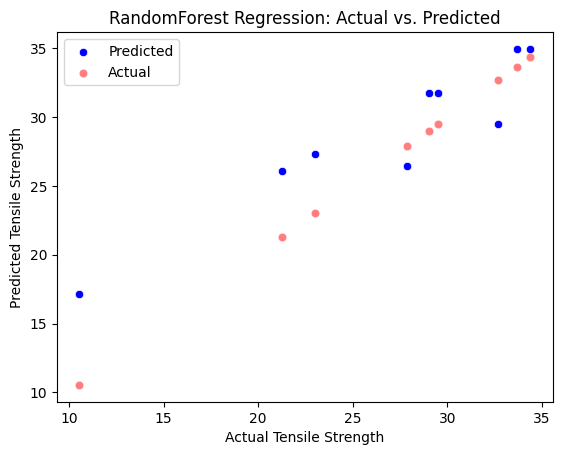

In [26]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('RandomForest Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# SupportVectorReg Model

In [27]:
modelSVR = SVR()
modelSVR.fit(xTrain, yTrain)

SVR()

In [28]:
yPred = modelSVR.predict(xTest)
yPred

array([26.7507989 , 26.75582383, 26.75582383, 27.46050291, 28.90469784,
       27.46050291, 27.84853127, 27.43874895, 26.85897323])

In [29]:
print("Root Mean Square Error: ", np.sqrt(mean_squared_error(yTest, yPred)))
print('Mean Squared Error:', mean_squared_error(yTest, yPred))
print('R-squared:', r2_score(yTest, yPred))

Root Mean Square Error:  7.252955284034097
Mean Squared Error: 52.60536035219812
R-squared: -0.02419311452777473


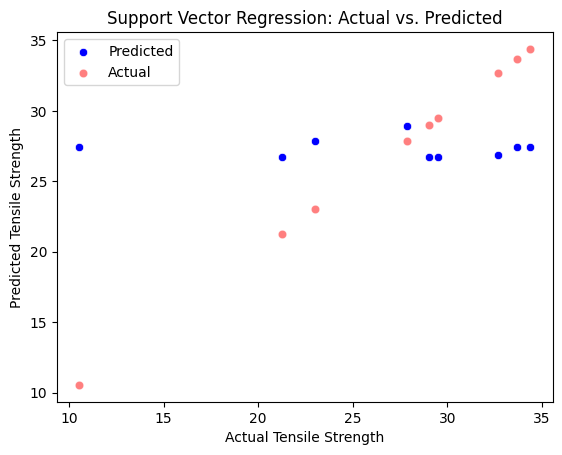

In [30]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('Support Vector Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# GradBoostingReg Model

In [31]:
modelGBR = GradientBoostingRegressor(random_state=42)
modelGBR.fit(xTrain, yTrain)

GradientBoostingRegressor(random_state=42)

In [32]:
yPred = modelGBR.predict(xTest)
yPred

array([25.71181741, 31.54740627, 31.54740627, 36.49305978, 26.45297316,
       36.49305978, 26.75196409, 15.44766411, 29.39415521])

In [33]:
print("Root Mean Square Error: ", np.sqrt(mean_squared_error(yTest, yPred)))
print('Mean Squared Error:', mean_squared_error(yTest, yPred))
print('R-squared:', r2_score(yTest, yPred))

Root Mean Square Error:  3.2230763249268324
Mean Squared Error: 10.388220996303856
R-squared: 0.7977479035335094


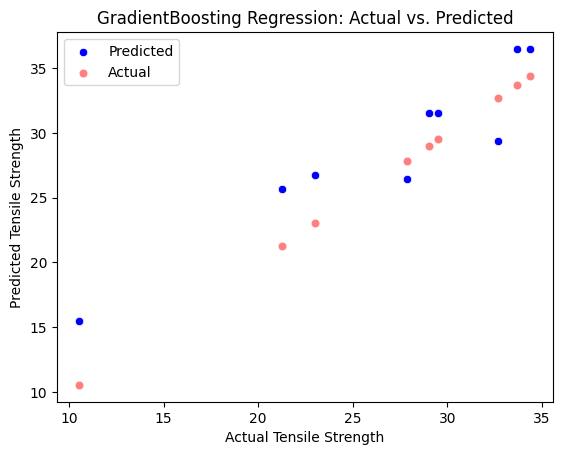

In [34]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('GradientBoosting Regression: Actual vs. Predicted')
plt.legend()
plt.show()